In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [3]:
historical_bonds = pd.read_csv('historical_bonds.csv')
simulation_bonds = pd.read_csv('simulation_bonds.csv')
historical_bonds["credit_region"] = historical_bonds["credit_rating"] + " - " + historical_bonds["region"]
historical_bonds.head(10)


,Unnamed: 0,credit_rating,debt_to_equity,energy_capacity,esg_rating,region,cash_flow_1,cash_flow_2,cash_flow_3,credit_region
0,0,AAA,-0.364063,3.277333,57.459739,North America,16073.383072,18258.536478,19058.838868,AAA - North America
1,1,AA,-0.098335,17.823871,22.871580,North America,24916.360679,24239.463191,24424.154724,AA - North America
2,2,B,0.938648,25.360441,42.125540,North America,39714.279589,35392.069106,0.000000,B - North America
3,3,A,2.332380,38.748027,50.833794,Europe,38811.989952,51241.902369,62943.802597,A - Europe
4,4,AAA,1.367557,14.223886,21.952435,Asia,24840.652670,29598.165602,35355.805194,AAA - Asia
5,5,AA,1.136835,45.559230,4.937207,North America,41319.949490,49554.860943,56756.581917,AA - North America
6,6,BB,0.326345,29.202362,2.679368,Asia,51735.147503,45192.425815,41922.076984,BB - Asia
7,7,AA,-0.071959,20.476767,24.087962,Europe,26603.161560,26006.160333,24822.651000,AA - Europe
8,8,A,1.404687,24.008972,39.442283,North America,32354.247347,33708.722166,33763.059334,A - North America
9,9,BBB,0.544998,11.235985,69.104053,Europe,34997.692078,38896.668698,41406.625888,BBB - Europe


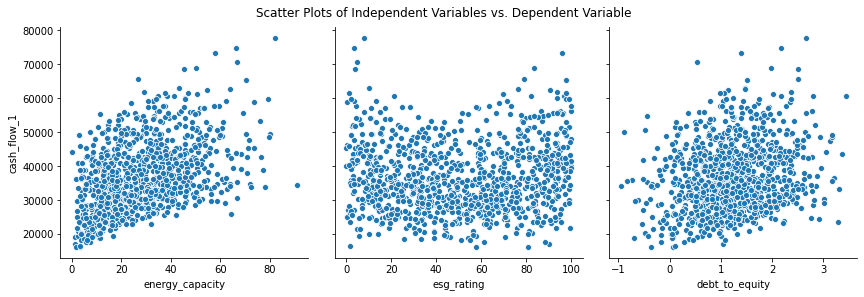

In [4]:


north_america_AAA = historical_bonds[historical_bonds["credit_region"] == "A - Asia"]

sns.pairplot(historical_bonds , 
             x_vars=["energy_capacity", "esg_rating", "debt_to_equity"], 
             y_vars=["cash_flow_1"], 
             kind="scatter", 
             height=4, 
             aspect=1)

plt.suptitle("Scatter Plots of Independent Variables vs. Dependent Variable", y=1.02)
plt.show()


<AxesSubplot:>

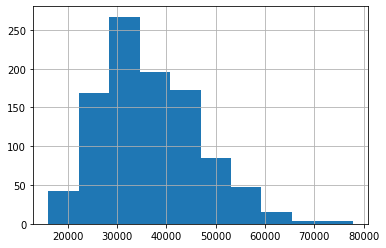

In [5]:
historical_bonds['cash_flow_1'].hist()

<AxesSubplot:>

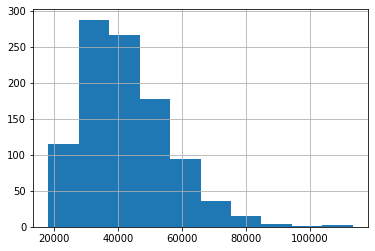

In [6]:
historical_bonds['cash_flow_2'].hist()

In [7]:
historical_bonds['credit_rating'].unique()

array(['AAA', 'AA', 'B', 'A', 'BB', 'BBB', 'CCC'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

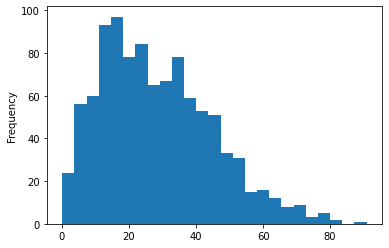

In [8]:
historical_bonds['energy_capacity'].plot(kind='hist', bins=25)

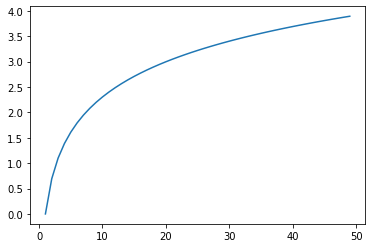

In [9]:
x = np.arange(1, 50) 
y = np.log(x)

plt.plot(x, y)

<AxesSubplot:xlabel='log_x'>

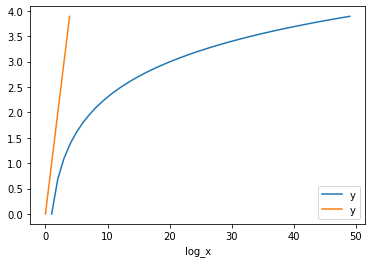

In [10]:
df = pd.DataFrame.from_dict({'x': x, 'y': y})
df['log_x'] = df['x'].apply(np.log)

fig, ax = plt.subplots()
df.plot(x='x', y='y', ax=ax)
df.plot(x='log_x', y='y', ax=ax)

In [11]:
import statsmodels.api as sm

In [12]:
mask = historical_bonds['credit_rating'] == 'AAA'
x = sm.add_constant(historical_bonds.loc[mask, ['esg_rating']].add(1).apply(lambda x: x ** 2))
y = historical_bonds.loc[mask, 'cash_flow_1']

model = sm.OLS(y, x).fit() 

model.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.491
Date:                Fri, 21 Feb 2025   Prob (F-statistic):            0.00660
Time:                        10:49:49   Log-Likelihood:                -2817.7
No. Observations:                 281   AIC:                             5639.
Df Residuals:                     279   BIC:                             5647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.741e+04    479.803     57.132      0.000    2.65e+04    2.84e+04
esg_rating     0.2861      0.105      2.737      0.007       0.080       0.492
==============================================================================
Omnibus:                        3.445   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.519
Skew:                           0.063   Prob(JB):                        0.284
Kurtosis:                       2.553   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model: regressing cash_flow_1 on esg_rating

In [13]:
x = sm.add_constant(historical_bonds.loc[mask, ['esg_rating']])
# y = historical_bonds['cash_flow_1']
model = sm.OLS(y, x).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.302
Date:                Fri, 21 Feb 2025   Prob (F-statistic):              0.130
Time:                        10:49:49   Log-Likelihood:                -2820.2
No. Observations:                 281   AIC:                             5644.
Df Residuals:                     279   BIC:                             5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.754e+04    641.789     42.906      0.000    2.63e+04    2.88e+04
esg_rating    17.0758     11.254      1.517      0.130      -5.077      39.229
==============================================================================
Omnibus:                        3.538   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.818
Skew:                           0.124   Prob(JB):                        0.244
Kurtosis:                       2.577   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
historical_bonds['energy_capacity_log'] = historical_bonds['energy_capacity'].add(1).apply(np.log)

<AxesSubplot:xlabel='energy_capacity_log', ylabel='cash_flow_1'>

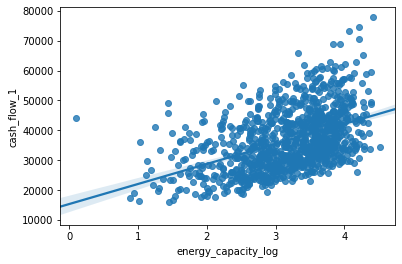

In [15]:
sns.regplot(data=historical_bonds, x='energy_capacity_log', y='cash_flow_1')

<AxesSubplot:xlabel='cash_flow_1', ylabel='cash_flow_2'>

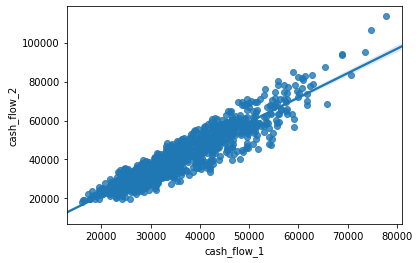

In [16]:
sns.regplot(data=historical_bonds, x='cash_flow_1', y='cash_flow_2')

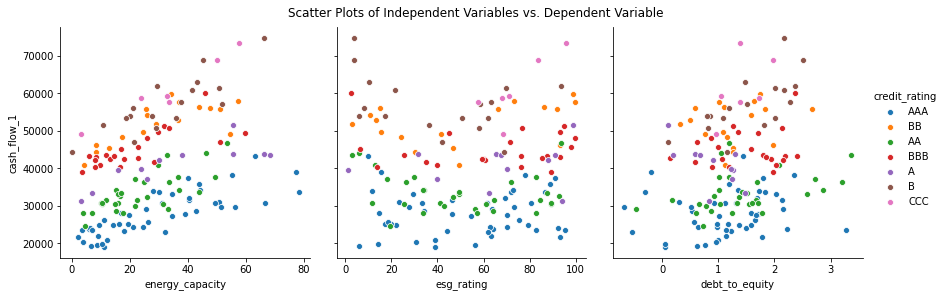

In [17]:
north_america_AAA = historical_bonds[historical_bonds["credit_region"] == "A - Asia"]

REGION = 'Asia'
RATING = ['BBB', 'AAA']
by_region = historical_bonds[historical_bonds['region'] == REGION]
by_rating = historical_bonds[historical_bonds['credit_rating'].isin(RATING)]

sns.pairplot(by_region, 
             x_vars=["energy_capacity", "esg_rating", "debt_to_equity"], 
             y_vars=["cash_flow_1"], 
             kind="scatter", 
             height=4, 
             aspect=1, hue='credit_rating')

plt.suptitle("Scatter Plots of Independent Variables vs. Dependent Variable", y=1.02)
plt.show()


In [18]:
training_data = historical_bonds[["energy_capacity", "debt_to_equity", "credit_region","cash_flow_1", "cash_flow_2", "cash_flow_3", 'credit_rating', 'region', 'esg_rating']]
training_data

,energy_capacity,debt_to_equity,credit_region,cash_flow_1,cash_flow_2,cash_flow_3,credit_rating,region,esg_rating
0,3.277333,-0.364063,AAA - North America,16073.383072,18258.536478,19058.838868,AAA,North America,57.459739
1,17.823871,-0.098335,AA - North America,24916.360679,24239.463191,24424.154724,AA,North America,22.871580
2,25.360441,0.938648,B - North America,39714.279589,35392.069106,0.000000,B,North America,42.125540
3,38.748027,2.332380,A - Europe,38811.989952,51241.902369,62943.802597,A,Europe,50.833794
4,14.223886,1.367557,AAA - Asia,24840.652670,29598.165602,35355.805194,AAA,Asia,21.952435
...,...,...,...,...,...,...,...,...,...
995,17.527648,0.840647,CCC - Europe,50876.513554,53549.216004,0.000000,CCC,Europe,26.744813
996,18.241791,0.632371,AAA - Europe,25788.520417,27706.100521,27425.785246,AAA,Europe,94.688375
997,23.294626,1.086183,AA - North America,29631.868285,28941.561132,28827.280542,AA,North America,25.456681
998,77.065382,-0.197552,AAA - Asia,38988.652285,44413.990671,49565.597051,AAA,Asia,15.642536


In [19]:
grouped = training_data.groupby('credit_rating')
regression_results = []

for region, group in grouped:
    X = sm.add_constant(group[['energy_capacity', 'debt_to_equity']])  # Now includes both independent variables
    y = group['cash_flow_1'].values 

    model = sm.OLS(y, X).fit()

    conf_ints = model.conf_int()
    
    regression_results.append({
        'credit_region': region,
        'energy_capacity_coefficient': model.params.loc['energy_capacity'],
        'debt_to_equity_coefficient': model.params.loc['debt_to_equity'],
        'debt_to_equity_lower_ci': model.conf_int().loc['debt_to_equity', 0],
        'debt_to_equity_upper_ci': model.conf_int().loc['debt_to_equity', 1],
        'energy_capacity_lower_ci': model.conf_int().loc['energy_capacity', 0],
        'energy_capacity_upper_ci': model.conf_int().loc['energy_capacity', 1],
        'intercept': model.params.loc['const'],
        'r2': model.rsquared, 
        'cash_flow_model': 0  # Placeholder,

    })

cash_flow_1_models = pd.DataFrame(regression_results)

cash_flow_1_models.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,credit_region,energy_capacity_coefficient,debt_to_equity_coefficient,debt_to_equity_lower_ci,debt_to_equity_upper_ci,energy_capacity_lower_ci,energy_capacity_upper_ci,intercept,r2,cash_flow_model
0,A,308.536467,2725.204805,1688.789496,3761.620115,267.976239,349.096694,24255.700891,0.738769,0
1,AA,246.748948,3177.777862,2703.133522,3652.422202,223.957530,269.540365,21419.691031,0.733576,0
2,AAA,266.671854,2880.149916,2452.026352,3308.273481,247.586000,285.757708,17335.010417,0.766491,0
3,B,240.750037,4404.992563,2710.570012,6099.415114,170.033294,311.466780,35985.789194,0.381412,0
4,BB,323.100961,2955.205993,1490.655710,4419.756276,251.995997,394.205925,31741.075368,0.539412,0


<AxesSubplot:>

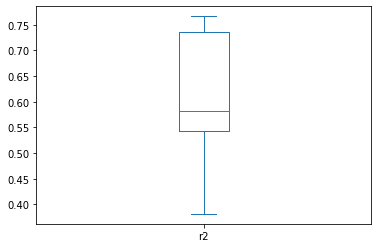

In [20]:
cash_flow_1_models['r2'].plot(kind='box')

In [21]:
df.max()

x        49.00000
y         3.89182
log_x     3.89182
dtype: float64

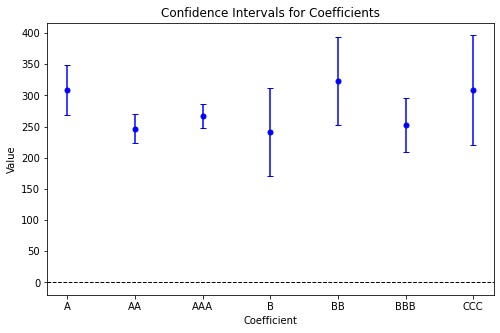

In [22]:
# Plot
VARIABLE = 'energy_capacity'

mask = cash_flow_1_models['credit_region'] != 'CCC - South America'

df = cash_flow_1_models.loc[mask]

fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(df['credit_region'], df[f"{VARIABLE}_coefficient"], 
            yerr=[df[f"{VARIABLE}_coefficient"] - df[f"{VARIABLE}_lower_ci"], df[f"{VARIABLE}_upper_ci"] - df[f"{VARIABLE}_coefficient"]], 
            fmt='o', capsize=3, capthick=1, markersize=5, color='blue')

# Labels and title
ax.set_xlabel("Coefficient")
ax.set_ylabel("Value")
ax.set_title("Confidence Intervals for Coefficients")
ax.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at 0

plt.show()

### Model everything together

In [23]:
training_data

,energy_capacity,debt_to_equity,credit_region,cash_flow_1,cash_flow_2,cash_flow_3,credit_rating,region,esg_rating
0,3.277333,-0.364063,AAA - North America,16073.383072,18258.536478,19058.838868,AAA,North America,57.459739
1,17.823871,-0.098335,AA - North America,24916.360679,24239.463191,24424.154724,AA,North America,22.871580
2,25.360441,0.938648,B - North America,39714.279589,35392.069106,0.000000,B,North America,42.125540
3,38.748027,2.332380,A - Europe,38811.989952,51241.902369,62943.802597,A,Europe,50.833794
4,14.223886,1.367557,AAA - Asia,24840.652670,29598.165602,35355.805194,AAA,Asia,21.952435
...,...,...,...,...,...,...,...,...,...
995,17.527648,0.840647,CCC - Europe,50876.513554,53549.216004,0.000000,CCC,Europe,26.744813
996,18.241791,0.632371,AAA - Europe,25788.520417,27706.100521,27425.785246,AAA,Europe,94.688375
997,23.294626,1.086183,AA - North America,29631.868285,28941.561132,28827.280542,AA,North America,25.456681
998,77.065382,-0.197552,AAA - Asia,38988.652285,44413.990671,49565.597051,AAA,Asia,15.642536


### Andrea's best model for cash_flow_1 (No interaction terms)

In [24]:
training_data_dummies = pd.get_dummies(training_data, columns=["credit_rating", 'region'], prefix="rating", dtype=int).drop(['rating_AAA', 'rating_North America'], axis=1)
training_data_dummies



training_data_dummies['esg_rating_squared'] = training_data_dummies['esg_rating'] ** 2
#training_data_dummies['log_energy_capacity'] = training_data_dummies['energy_capacity'].add(1).apply(np.log)
y = training_data_dummies['cash_flow_1']
X = sm.add_constant(training_data_dummies.drop(['cash_flow_1', 'cash_flow_2', 'cash_flow_3', 'credit_region', 'esg_rating'], axis=1))
model = sm.OLS(y, X).fit()
model.summary()



X_new = sm.add_constant(
    training_data_dummies.drop(['cash_flow_1', 'cash_flow_2', 'cash_flow_3', 'credit_region', 'esg_rating'], axis=1)
)


pred = model.get_prediction(X_new)
pred_df = pred.summary_frame(alpha=0.05)  # 95% CI by default
pred_df["cash_flow_1"] = training_data_dummies['cash_flow_1']
pred_df
mse = np.mean((pred_df['mean'] - pred_df['cash_flow_1'])**2)
mse

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


11171491.494193299

In [25]:
np.sqrt(11171491)

3342.3780456435506

### Will's original model for cash_flow_1 (Breaking down into credit_region)

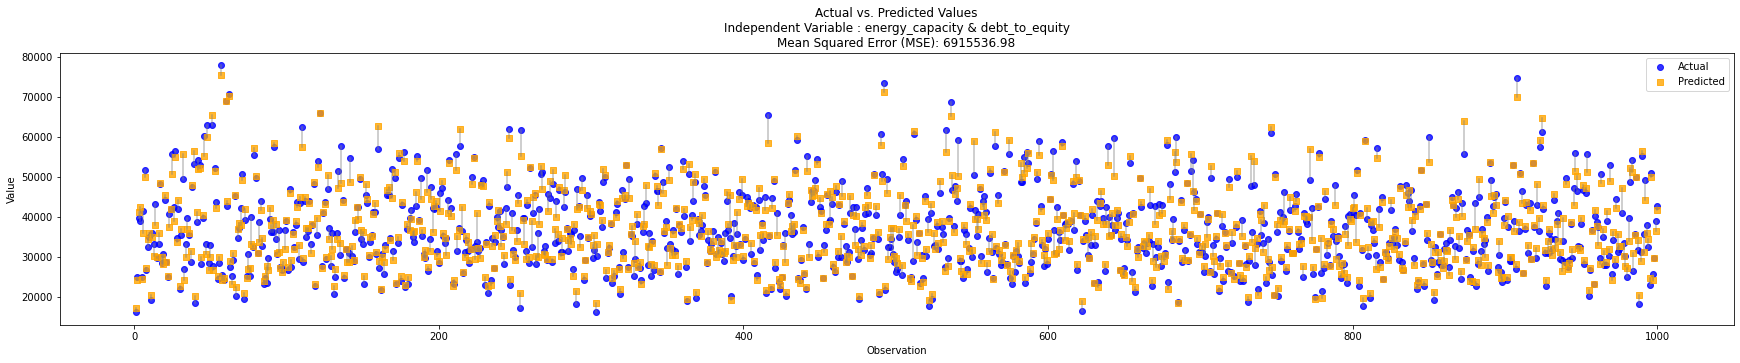

6915536.9754596995

In [27]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['energy_capacity', 'debt_to_equity']].values  # Now includes both independent variables
    y = group['cash_flow_1'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'energy_capacity_coefficient': model.coef_[0],
        'debt_to_equity_coefficient': model.coef_[1],
        'intercept': model.intercept_,
        'cash_flow_model': 0  # Placeholder
    })

cash_flow_models = pd.DataFrame(regression_results)



#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_models, on='credit_region', how='left')
merged_df_2['cash_flow_1_prediction'] = merged_df_2['energy_capacity'] * merged_df_2['energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_1']
predicted = merged_df_2['cash_flow_1_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity\nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse



### BEST MODEL for cash flow 1

### Will's updated model for cash_flow_1 (Breaking down into credit_region and esg_rating**2)

Maybe replace esg_rating^2 with a polynomial \
Also play around with different transformations \
Currently we should use this as it has the lowest MSE

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


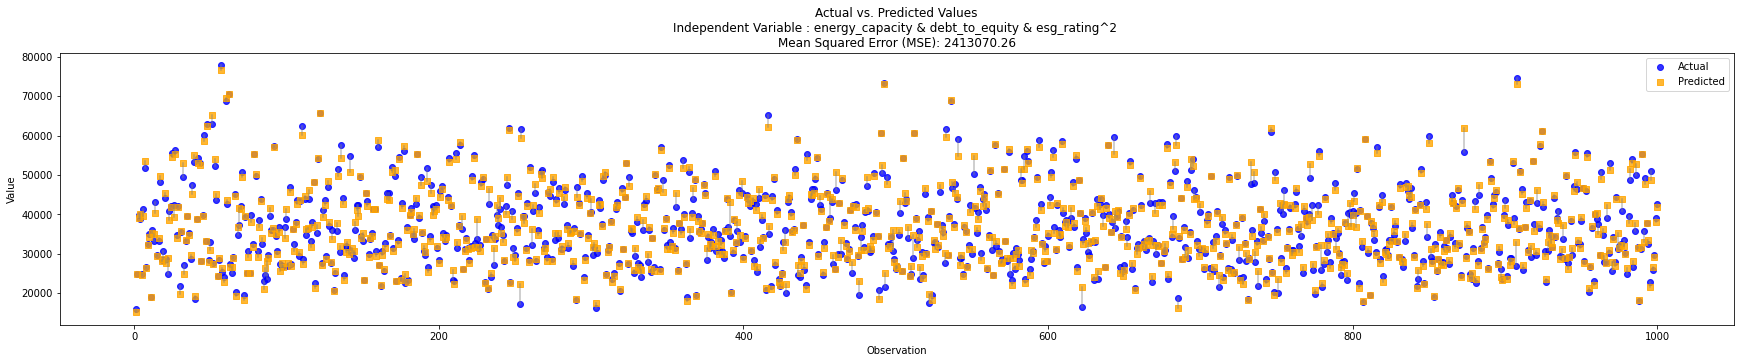

2413070.2607992063

In [34]:







training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2

grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['energy_capacity', 'debt_to_equity', 'esg_rating_squared', 'esg_rating']].values  # Now includes both independent variables
    y = group['cash_flow_1'].values 
    



    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'energy_capacity_coefficient': model.coef_[0],
        'debt_to_equity_coefficient': model.coef_[1],
        'esg_rating_squared_coefficient': model.coef_[2],
        'esg_rating_coefficient': model.coef_[3],
        
        'intercept': model.intercept_,
        'cash_flow_model': 0  # Placeholder
    })

cash_flow_models = pd.DataFrame(regression_results)




#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_models, on='credit_region', how='left')
merged_df_2['cash_flow_1_prediction'] = merged_df_2['energy_capacity'] * merged_df_2['energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['esg_rating_squared'] * merged_df_2['esg_rating_squared_coefficient']+ merged_df_2['esg_rating'] * merged_df_2['esg_rating_coefficient'] +merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_1']
predicted = merged_df_2['cash_flow_1_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse




In [82]:
np.sqrt(2413070)

1553.4059353562416

In [57]:
np.sqrt(6160143)

2481.963537201947

### Will's 2nd updated model for cash_flow_1 (Breaking down into credit_region and esg_rating**2)

log of energy_capacity \
squared of esg_rating

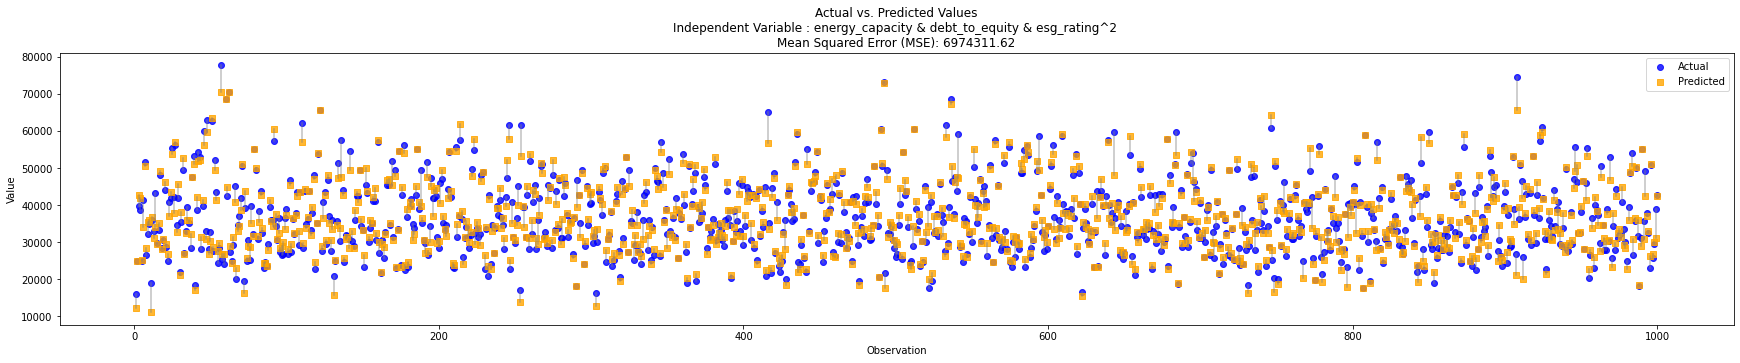

6974311.6236990355

In [56]:
training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2
training_data['log_energy_capacity'] = np.log(training_data['energy_capacity'])



grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['log_energy_capacity', 'debt_to_equity', 'esg_rating_squared']].values  # Now includes both independent variables
    y = group['cash_flow_1'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'log_energy_capacity_coefficient': model.coef_[0],
        'debt_to_equity_coefficient': model.coef_[1],
        'esg_rating_squared_coefficient': model.coef_[2],
        'intercept': model.intercept_,
        'cash_flow_model': 0  # Placeholder
    })

cash_flow_models = pd.DataFrame(regression_results)




#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_models, on='credit_region', how='left')
merged_df_2['cash_flow_1_prediction'] = merged_df_2['log_energy_capacity'] * merged_df_2['log_energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['esg_rating_squared'] * merged_df_2['esg_rating_squared_coefficient']+merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_1']
predicted = merged_df_2['cash_flow_1_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse


### Forecasting cash flow 2 models

### BEST MODEL FOR CASH FLOW 2 Will's new model

In [1]:
training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['cash_flow_1','energy_capacity', 'debt_to_equity', 'esg_rating_squared', 'esg_rating' ]].values  
    y = group['cash_flow_2'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'cash_flow_1_coefficient': model.coef_[0],
        'energy_capacity_coefficient': model.coef_[1],
        'debt_to_equity_coefficient': model.coef_[2],
        'esg_rating_squared_coefficient': model.coef_[3],
        'esg_rating_coefficient': model.coef_[4],
        
        'intercept': model.intercept_,
        'cash_flow_model': 1
    })

cash_flow_2_models = pd.DataFrame(regression_results)

print()



#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_2_models, on='credit_region', how='left')
merged_df_2['cash_flow_2_prediction'] = merged_df_2['cash_flow_1'] * merged_df_2['cash_flow_1_coefficient'] + merged_df_2['energy_capacity'] * merged_df_2['energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['esg_rating_squared'] * merged_df_2['esg_rating_squared_coefficient']+merged_df_2['esg_rating'] * merged_df_2['esg_rating_coefficient'] +merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_2']
predicted = merged_df_2['cash_flow_2_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse


NameError: name 'training_data' is not defined

In [2]:
np.sqrt(11968641)

NameError: name 'np' is not defined

In [3]:
np.sqrt(12997631)

NameError: name 'np' is not defined

### Will's original model

In [4]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['cash_flow_1']].values  
    y = group['cash_flow_2'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'gradient': model.coef_[0],
        'intercept': model.intercept_,
        'cash_flow_model': 2
    })

cash_flow_2_models = pd.DataFrame(regression_results)



#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_2_models, on='credit_region', how='left')
merged_df_2['cash_flow_2_prediction'] = merged_df_2['cash_flow_1'] * merged_df_2['gradient'] +merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_2']
predicted = merged_df_2['cash_flow_2_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse




NameError: name 'training_data' is not defined

### Forecasting cash flow 3 models

### BEST MODEL FOR CASH FLOW 3 Will's New Model 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


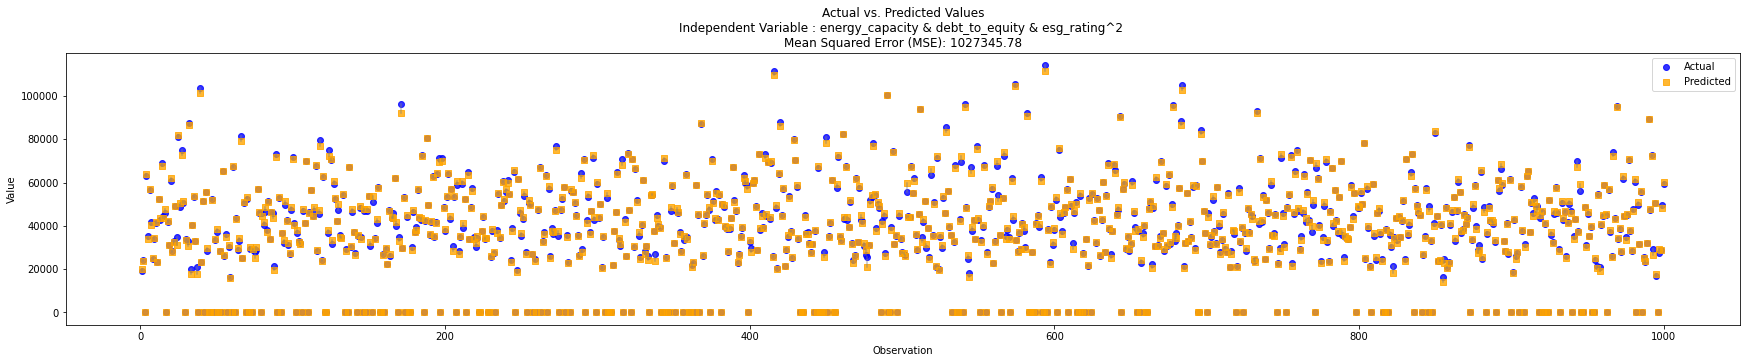

1027345.7787619585

In [30]:
training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    
    X = group[["debt_to_equity", "energy_capacity", "esg_rating", 'cash_flow_1','cash_flow_2', "esg_rating_squared"]].values 
    y = group['cash_flow_3'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'debt_to_equity_coefficient': model.coef_[0],
        'energy_capacity_coefficient': model.coef_[1],
        'esg_rating_coefficient': model.coef_[2],
        'cash_flow_1_coefficient': model.coef_[3],
        'cash_flow_2_coefficient': model.coef_[4],
        'esg_rating_squared_coefficient': model.coef_[5],
        'intercept': model.intercept_,
        'cash_flow_model': 2
    })

cash_flow_3_models = pd.DataFrame(regression_results)

print()



#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_3_models, on='credit_region', how='left')
merged_df_2['cash_flow_3_prediction'] = merged_df_2['cash_flow_2'] * merged_df_2['cash_flow_2_coefficient'] + merged_df_2['cash_flow_1'] * merged_df_2['cash_flow_1_coefficient'] + merged_df_2['energy_capacity'] * merged_df_2['energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['esg_rating_squared'] * merged_df_2['esg_rating_squared_coefficient'] + merged_df_2['esg_rating'] * merged_df_2['esg_rating_coefficient']+merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_3']
predicted = merged_df_2['cash_flow_3_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse

In [89]:
np.sqrt(1027345)

1013.5802878904068

In [75]:
np.sqrt(1066056)

1032.4998789346175

### Will's Original Model 

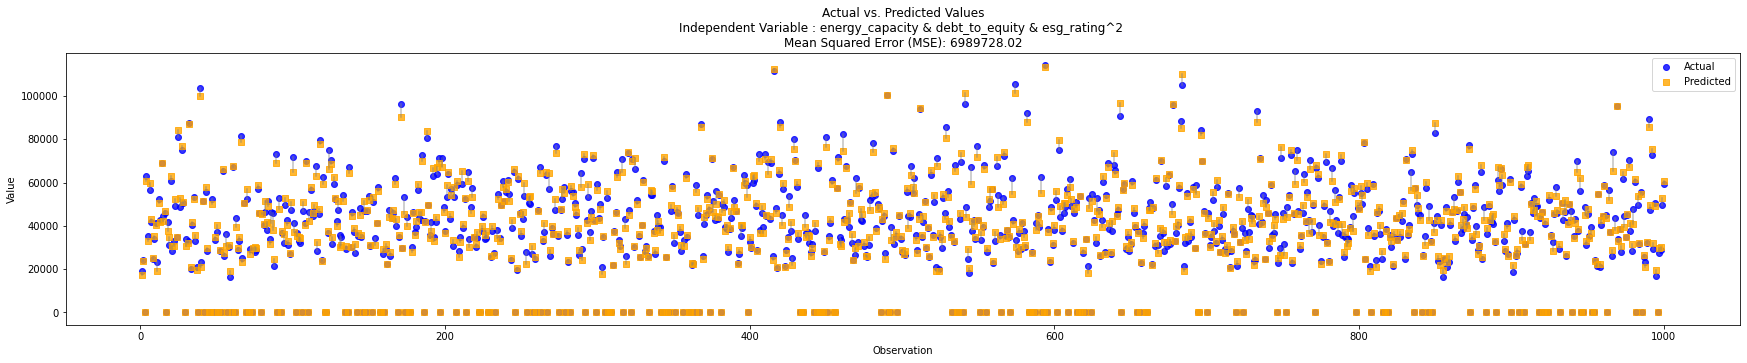

6989728.02429376

In [72]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['cash_flow_2']].values  
    y = group['cash_flow_3'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'gradient': model.coef_[0],
        'intercept': model.intercept_,
        'cash_flow_model': 2
    })

cash_flow_3_models = pd.DataFrame(regression_results)






#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_3_models, on='credit_region', how='left')
merged_df_2['cash_flow_3_prediction'] = merged_df_2['cash_flow_2'] * merged_df_2['gradient'] +merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_3']
predicted = merged_df_2['cash_flow_3_prediction']  


mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse



In [3]:
np.sqrt(6989728.02429376)

2643.8093774502277

Combining all the models together

In [ ]:
models = pd.concat([cash_flow_1_models, cash_flow_2_models, cash_flow_3_models], axis=0, ignore_index=True)
models 

In [ ]:
models.to_csv('model_parameters.csv', index=False)
